In [1]:
%matplotlib notebook

In [5]:
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
filePath = r'C:\Users\apbarret\Documents\data\BeringStraitHeatFlux\MERRA2_400.instM_2d_asm_Nx.V10M.month.1980to2018.nc4'

In [6]:
ds = xr.open_dataset(filePath)
ds

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 576, time: 461)
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 -87.5 -87.0 -86.5 ...
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 -177.5 -176.9 -176.2 ...
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 1980-03-01 ...
Data variables:
    V10M     (time, lat, lon) float32 ...
Attributes:
    created_by:  Andrew P. Barrett <apbarret@nsidc.org
    created:     20180626
    source:      https://goldsmr4.gesdisc.eosdis.nasa.gov/opendap/MERRA2_MONT...

Extract cells around Bering Strait

In [ ]:
# A3: lat=66.338, lon=-168.968
tmp = ds['V10M'].sel(lat=slice(65.,67.), lon=slice(-170.,-168.))

Calculate latitude weights

In [98]:
import numpy as np

dim = tmp[0,:,:].shape
x = xr.DataArray(np.ones(np.array(dim).prod()).reshape(dim), coords=tmp[0,:,:].coords, dims=tmp[0,:,:].dims)
weight = x * np.cos(tmp['lat'])
weight = weight / weight.sum()

<xarray.DataArray ()>
array(1.)
Coordinates:
    time     datetime64[ns] 1980-01-01

In [99]:
v10m_bs = (tmp*weight).sum(dim=['lat','lon'])
#v10m_bs = tmp.mean(dim=['lat','lon'])
v10m_bs

<xarray.DataArray (time: 461)>
array([-3.839101, -4.925008, -4.902414, ...,  0.330427, -4.015928, -4.611506])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 1980-03-01 ...

In [100]:
thistime = [dt.datetime.strptime(t,'%Y%m') for t in ['200510','200709','201610','201611','201612']]
v = v10m_bs.sel(time=thistime).values
v

array([-2.61925854,  0.39063561,  1.97459499, -3.84131406, -0.65097791])

<IPython.core.display.Javascript object>


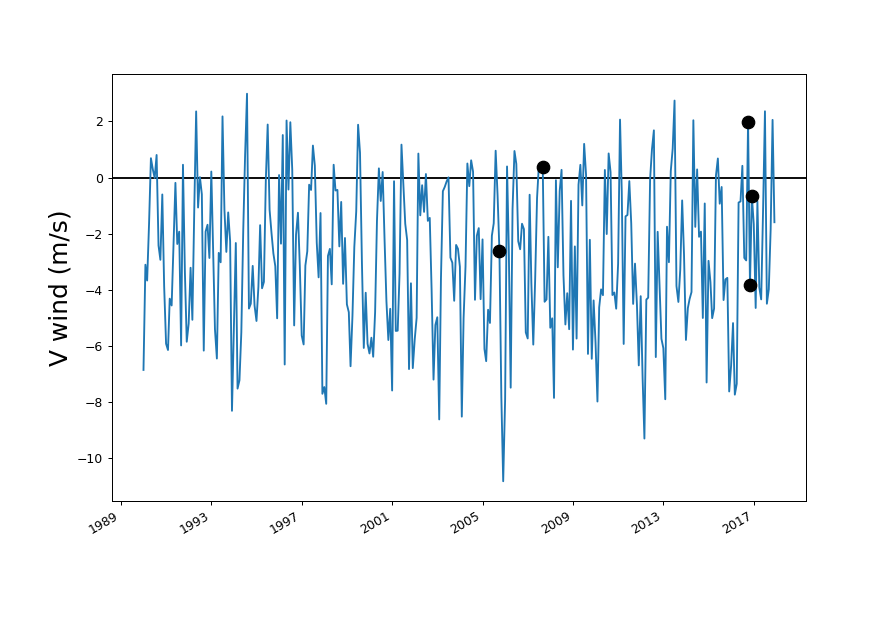

In [105]:
import datetime as dt

fig, ax = plt.subplots(figsize=(10,7))

#['200709','201610','201611','201612']


v10m_bs.sel(time=slice('1990','2017')).plot(ax=ax)
ax.axhline(0.,c='k', zorder=0)

ax.set_ylabel('V wind (m/s)', fontsize=20)
ax.set_xlabel('')

ax.plot(thistime,v,'ko',ms=10)

fig.savefig(r'C:\Users\apbarret\Documents\data\BeringStraitHeatFlux\MERRA2_400.instM_2d_asm_Nx.V10M.BeringStrait.month.1980to2018.png')

In [110]:
thistime = [dt.datetime.strptime(t,'%Y%m') for t in ['200510','200709','201610','201611','201612']]
vdf = v10m_bs.sel(time=thistime).to_dataframe(name='v10m_bs')
vdf


,v10m_bs
time,
2005-10-01,-2.619259
2007-09-01,0.390636
2016-10-01,1.974595
2016-11-01,-3.841314
2016-12-01,-0.650978


In [117]:
vv = v10m_bs.sel(time=slice('1990','2017'))
vv

<xarray.DataArray (time: 336)>
array([-6.851405, -3.105577, -3.667802, ..., -1.84888 ,  2.051759, -1.592546])
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01 1990-02-01 1990-03-01 ...

In [118]:
vv[vv > 0.].count()/vv.count()

<xarray.DataArray ()>
array(0.172619)

In [119]:
vv[vv <= 0.].count()/vv.count()

<xarray.DataArray ()>
array(0.827381)

In [120]:
vv[vv > 0.].mean()

<xarray.DataArray ()>
array(0.916874)

In [121]:
vv[vv <= 0.].mean()

<xarray.DataArray ()>
array(-3.661781)